In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

In [ ]:
# Van der Pol equation
# example showing stiff ODE
# from https://sundnes.github.io/solving_odes_in_python/ode_book.pdf
# page 35 eq 3.1 and 3.2

$$
\begin{eqnarray}
y_1' &=& y_2 \\
y_2' &=& \mu (1 - y_1^2)y_2 - y_1
\end{eqnarray}
$$

with initial conditions

$$
\begin{eqnarray}
y_1(0) &=& 1 \\
y_2(0) &=& 0
\end{eqnarray}
$$

In [5]:
def rhs(t, y, mu):
    y1 = y[0]
    y2 = y[1]
    y1_prime = y2
    y2_prime = mu * (1 - y1**2) * y2 - y1
    return [y1_prime, y2_prime]

In [53]:
def run(mu):
    t_span = [0, 20]
    y0 = [1, 0]
    t_eval = np.arange(t_span[0], t_span[1], 0.1)
    sol = scipy.integrate.solve_ivp(rhs, t_span, y0, args=[mu], t_eval=t_eval)
    return sol

In [54]:
mus = [0,1,5]
sol={}
for mu in mus:
    sol[mu] = run(mu)

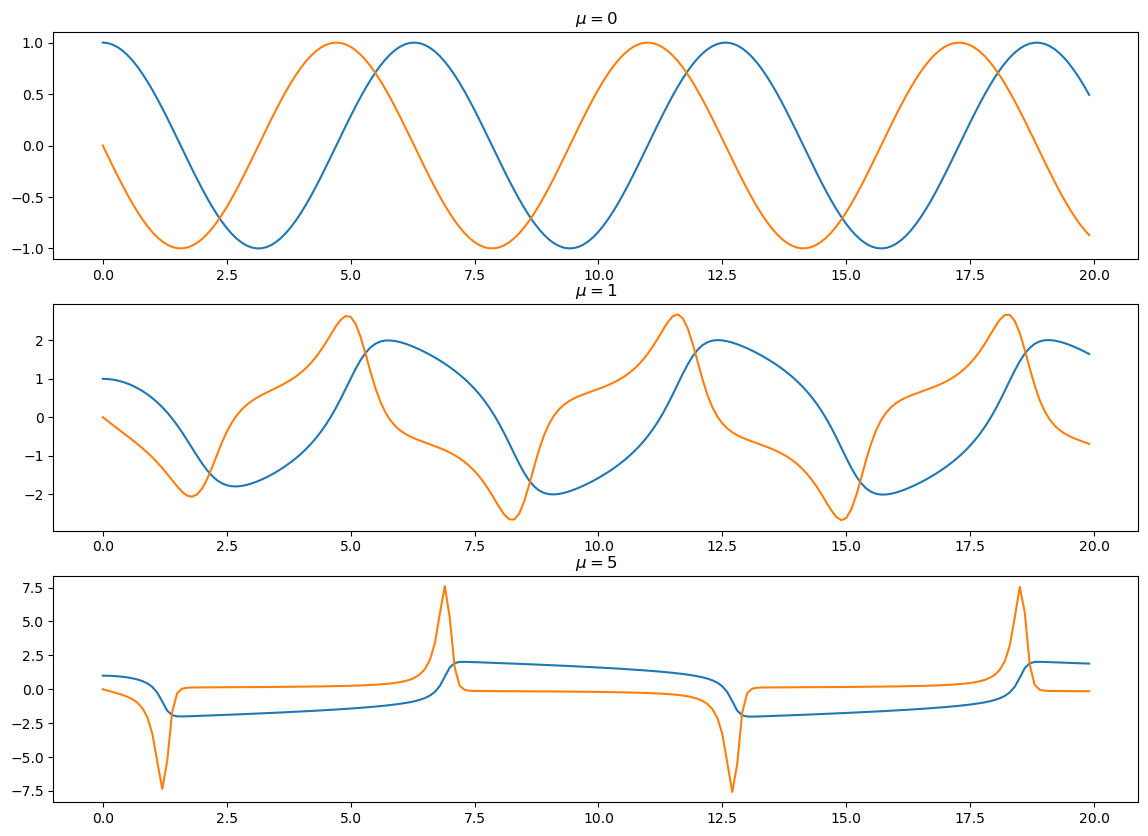

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(14,10))
for i, mu in enumerate(sol.keys()):
    axes[i].plot(sol[mu].t, sol[mu].y[0])
    axes[i].plot(sol[mu].t, sol[mu].y[1])
    axes[i].set_title(f"$\mu = {mu}$")